# Data Cleaning Practice  

Goals:
- Practice data cleaning with Python
- Seek concise code
- Clearly document decisions
- Be thorough 

Dataset:
- Alzheimers disease and healthy aging data
- Dataset Information 
    - https://www.cdc.gov/aging/healthybrain/brfss-faq-cognitive.htm
    - https://www.cdc.gov/aging/publications/BRFSS-cognitive-decline-brief-508.pdf

Contains information from (https://catalog.data.gov/dataset/alzheimers-disease-and-healthy-aging-data), which is made available
here under the Open Database License (ODbL) https://opendatacommons.org/licenses/odbl/1-0/.

Struggling to find documentation to better understand data and its design. 

In [134]:
### Packages
import numpy as np
import pandas as pd
import seaborn as sns
# Switch to modin when data wrangler extension is no longer needed
# import modin.pandas as pd 
import os
from janitor import clean_names
os.chdir('C:/Users/WulfN/')

### Read in Data
alz_messy = clean_names(pd.read_csv('./datasets/unclean_data_practice/Alzheimer_s_Disease_and_Healthy_Aging_Data.csv'))
                     
# remove scientific notation
pd.options.display.float_format = '{:20,.2f}'.format

# multitple outputs per cell
%config InteractiveShell.ast_node_interactivity = "all"

alz_messy.head(5)

,rowid,yearstart,yearend,locationabbr,locationdesc,datasource,class,topic,question,data_value_unit,...,stratification2,geolocation,classid,topicid,questionid,locationid,stratificationcategoryid1,stratificationid1,stratificationcategoryid2,stratificationid2
0,BRFSS~2022~2022~42~Q03~TMC01~AGE~RACE,2022,2022,PA,Pennsylvania,BRFSS,Mental Health,Frequent mental distress,Percentage of older adults who are experiencin...,%,...,Native Am/Alaskan Native,POINT (-77.86070029 40.79373015),C05,TMC01,Q03,42,AGE,5064,RACE,NAA
1,BRFSS~2022~2022~46~Q03~TMC01~AGE~RACE,2022,2022,SD,South Dakota,BRFSS,Mental Health,Frequent mental distress,Percentage of older adults who are experiencin...,%,...,Asian/Pacific Islander,POINT (-100.3735306 44.35313005),C05,TMC01,Q03,46,AGE,65PLUS,RACE,ASN
2,BRFSS~2022~2022~16~Q03~TMC01~AGE~RACE,2022,2022,ID,Idaho,BRFSS,Mental Health,Frequent mental distress,Percentage of older adults who are experiencin...,%,...,"Black, non-Hispanic",POINT (-114.36373 43.68263001),C05,TMC01,Q03,16,AGE,65PLUS,RACE,BLK
3,BRFSS~2022~2022~24~Q03~TMC01~AGE~RACE,2022,2022,MD,Maryland,BRFSS,Mental Health,Frequent mental distress,Percentage of older adults who are experiencin...,%,...,"Black, non-Hispanic",POINT (-76.60926011 39.29058096),C05,TMC01,Q03,24,AGE,65PLUS,RACE,BLK
4,BRFSS~2022~2022~55~Q03~TMC01~AGE~GENDER,2022,2022,WI,Wisconsin,BRFSS,Mental Health,Frequent mental distress,Percentage of older adults who are experiencin...,%,...,Male,POINT (-89.81637074 44.39319117),C05,TMC01,Q03,55,AGE,65PLUS,GENDER,MALE


In [2]:
alz_messy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284142 entries, 0 to 284141
Data columns (total 31 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   rowid                       284142 non-null  object 
 1   yearstart                   284142 non-null  int64  
 2   yearend                     284142 non-null  int64  
 3   locationabbr                284142 non-null  object 
 4   locationdesc                284142 non-null  object 
 5   datasource                  284142 non-null  object 
 6   class                       284142 non-null  object 
 7   topic                       284142 non-null  object 
 8   question                    284142 non-null  object 
 9   data_value_unit             284142 non-null  object 
 10  datavaluetypeid             284142 non-null  object 
 11  data_value_type             284142 non-null  object 
 12  data_value                  192808 non-null  float64
 13  data_value_alt

### Questions/Tasks after Viewing Data
Some questions to begin with.
- Does a data dictionary exist for this data?
    - https://chronicdata.cdc.gov/Healthy-Aging/Alzheimer-s-Disease-and-Healthy-Aging-Data/hfr9-rurv
- View categorys of the stratified columns
    - Create bar graphs with counts
- State or region indicator for the locationdesc column
- Change data value unit '%' to 'percentage'
- What is the data value alt?
- distinct data footnotes, can many of these be removed?
- how are the low and high confidence variables derived? 
- clean geolocation column, seperate latitude and longitude. 
- class id, question id, location id - what are these? 
- range of year start and year end?
- What do to with NAs for the data values?
- May group by location to see num rows per location
    - geographic bias?
    - ** Should not be needed due to fully populated locationid (double check)
- class is more descriptive and lcear than classid, drop classid
- topicid / questionid may be valuable for shorthand on topics / questions
- What level are the rows at - they may not be at the participant level
- If participants are asked multiple questions, can individual participants be inferred
- is rowid participant level
    - group by rowid. there are 39 topics and 39 questions, if # distinct rowid * 39 = len(alz_messy), this would suggest each participant is given the same questionaire. 
- 59 distinct locationids, only 54 distinct geolocations (11% of values are missing data - appears location ids of 9000+ correspond with missing lat/longitudes)
- Data Source is singular and can be removed from the dataframe
- stratificationcategory1 is only Age group 
- stratification1 contains 'overall', '50-64 years', and '65 years or older', equally distributed.
    - What is overall?
    - stratification1id is less verbose duplicate - will drop 
- 42% of stratification2 is 'other', data may be biased by race or gender
- stratificationcategory2 has race/ethnicity and gender.
- stratificationcategory2id populates missing values with 'overall', othwerise the same as stratificationscategory2
    - Does 'overall' for other variables mean data is missing, or something else
- stratificationid2 is shorthand for stratification 2
- are the questions the same every year?

### Summary of tasks given observations and questions
This will be updated over the course of analysis. Considerations are secondary tasks that may not be completed
- ~~Develop function to view each category of categorical variables~~
- ~~Partition dataset by yearend - yearstart > 0~~
    - ~~Investigate difference after data has been cleaned~~
- ~~Group by rowid, see dist'n of rowid counts~~
    - ~~May help clarify if data is at the participant level, or reveal that some participants have answered fewer questions~~
    - ~~first pass at rowid suggests data is at the different stratum level and individual participants may not be extracted~~
    - Data is organized at the state level (and sampled uniformly by stratum - mostly)
- ~~Create indicator for state/region~~
    - Consider summary statistics at the region or state level. 
    - Consider simple choropleth maths for state level stats.
- ~~Split geolocation into lat and long~~
    - consider creating image of locations on map
- ~~Remove unneeded columns: datasource, classid, data_value_unit, datavaluetypeid, one or both of (data_value_footnote / _symbol), stratificationcategory1, stratificationcategoryid1 (most likely)~~
- understand missing values (approx. 1/3rd of the data)
    - Are the counts of strat with missing data the same as counts without missing data?
- Is there bias in missing data or complete data by stratum?
- Should values be imputed? 
- View distribution of responses by questions over time.

In [374]:
# Lists to Numpy? 

class unique_categories: 

    def __init__(self, dataframe, category_list): 
        self.dataframe = dataframe
        self.category_list = category_list

    def category_dict(self): 
        """
        Create dictionary from dataframe with feature names and distinct 
        categories for that feature name.
        """
        category_df = self.dataframe[self.category_list]
        messy_category_dict = dict({c: category_df[c].unique() for c in category_df})
        
        get_categories = {}

        for key, values in messy_category_dict.items():
            get_categories[key] = values.tolist()

        return get_categories

    def get_num_categories(self): 
        """
        Number of categories per feature given.
        """
        category_dict = self.category_dict()

        num_categories = []

        for key in category_dict.keys():
            num_categories = num_categories + [len(category_dict[key])]

        return num_categories
    
    def category_lists(self): 
        """
        Lists with categories and NAs such that the length of all 
        lists are the same. 
        """
        num_categories = self.get_num_categories()
        category_dict = self.category_dict()

        add_na = []

        for item in num_categories:
            sum_na = [max(num_categories) - item]
            add_na = add_na + sum_na

        for i, key in enumerate(category_dict): 
            category_dict[key].extend([np.nan] * add_na[i])

        return category_dict

    def category_count_df(self):
        """
        Dataframe with feature names, number of categories for that feature, and a list of the categories for that feature. 
        """
        category_dict = self.category_dict()

        category_count_df = pd.DataFrame({
            'var_name': category_dict.keys(),
            'num_categories': self.get_num_categories(),
            'categories': list(category_dict.values())
        })

        return category_count_df

    def category_df(self):
        """
        Feature name as a column, categories as values for that feature.
        """
        category_lists = self.category_lists()

        category_df = pd.DataFrame(
            data = list(zip(*category_lists.values())), 
            columns = list(category_lists.keys())
        ) 

        return category_df

In [372]:
# Categorical columns
misc = ['datasource', 'class', 'classid', 'topic', 'topicid', 'question', 'questionid', 'data_value_footnote', 'locationid'] 
stratified = [col for col in alz_messy.columns if col.startswith('strati')]

category_features = misc + stratified 

In [381]:
# distinct catgories for each feature
category_info = unique_categories(alz_messy, category_features)
all_categories = category_info.category_df()

# Viewing questions to better understand study
questions_only = (all_categories[['question', 'questionid']].dropna()
                  .sort_values('questionid')
                  .reset_index(drop=True))
questions_only

,question,questionid
0,Percentage of older adults who are eating 2 or...,Q01
1,Percentage of older adults who are eating 3 or...,Q02
2,Percentage of older adults who are experiencin...,Q03
3,Percentage of older adults who have been told ...,Q04
4,Percentage of older adults who have fallen and...,Q05
5,Percentage of older adults who report having l...,Q07
6,Physically unhealthy days (mean number of days...,Q08
7,"Percentage of at risk adults (have diabetes, a...",Q09
8,Percentage of older adult men who are up to da...,Q10
9,Percentage of older adult women who are up to ...,Q11


In [386]:
# Does year start always equal year end? 
# need to ensure that when grouping by year we are grouping by the same time periods
diff_test = alz_messy[['yearstart', 'yearend']]
diff_test['yeardiff'] = alz_messy['yearend'] - alz_messy['yearstart']

multi_year = diff_test[diff_test['yeardiff'] > 0]
multi_year # 9261 rows have multiple years. 

print('percent of data that is multi-year:', round(len(multi_year) / len(alz_messy) * 100, 2), '%')

C:\Users\WulfN\AppData\Local\Temp\ipykernel_14524\1142676978.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  diff_test['yeardiff'] = alz_messy['yearend'] - alz_messy['yearstart']


,yearstart,yearend,yeardiff
31703,2019,2022,3
31707,2021,2022,1
31708,2021,2022,1
31709,2021,2022,1
31710,2021,2022,1
...,...,...,...
52022,2019,2022,3
52025,2019,2022,3
52032,2019,2022,3
52033,2019,2022,3


percent of data that is multi-year: 3.26 %


In [121]:
# create indicator variable for state / region / territory
location_counts = (alz_messy.groupby('locationdesc')
                   .agg(qty_rowid = ('locationdesc', 'count'))
                   .reset_index())

# the 9 Non-States are Guam, Puerto Rico, South, Midwest, (United States, DC & Territories), Virgin Islands, West, and Northeast,District of Columbia
regions = ['South', 'Midwest', 'West', 'Northeast']
territories = ['Guam', 'Puerto Rico', 'Virgin Islands', 'United States, DC & Territories', 'District of Columbia']

# Creating alternate dataframe to add variables to
alz_messy_2 = alz_messy.copy()

alz_messy_2['location_indicator'] = np.where(alz_messy['locationdesc'].isin(regions), 'Region', 
                                           np.where(alz_messy['locationdesc'].isin(territories), 'Territory', 'State'))

alz_messy_2['location_indicator'].value_counts()

location_indicator
State        240137
Region        24357
Territory     19648
Name: count, dtype: int64

In [123]:
# clean up location variable and seperate into lat and long
alz_messy_2['geolocation'] = alz_messy_2['geolocation'].str.replace('POINT (', '').str.replace(')', '')
alz_messy_2['latitude'] = alz_messy_2['geolocation'].str.split(' ').str[0]
alz_messy_2['longitude'] = alz_messy_2['geolocation'].str.split(' ').str[1]

alz_messy_2[['geolocation', 'latitude', 'longitude']].head(5)

,geolocation,latitude,longitude
0,-77.86070029 40.79373015,-77.86070029,40.79373015
1,-100.3735306 44.35313005,-100.3735306,44.35313005
2,-114.36373 43.68263001,-114.36373,43.68263001
3,-76.60926011 39.29058096,-76.60926011,39.29058096
4,-89.81637074 44.39319117,-89.81637074,44.39319117


In [147]:
# Drop unnecessary variables
cleaner = alz_messy_2.drop(columns = ['datasource', 'geolocation', 'locationabbr', 'locationid', 'class', 'data_value_unit', 'datavaluetypeid', 'data_value_alt', 'data_value_footnote_symbol', 'stratificationcategory1', 'stratificationcategoryid1', 'stratification1', 'stratificationcategory2', 'stratification2']) # strat columns? 

# remove intermediary dataframe
del alz_messy_2

## The following section views sampling biases across stratum, missing / complete data, and single/multi year studies
- Have not found study design and have chosen to understand distribution of variables in this way
- Seeing if sampling strategy is the same each year, each question, for missing / complete data, and single / multi year sections
    - This will inform if missing data should be imputed

In [387]:
# multi year data
multi_year_count = (cleaner.iloc[multi_year.index].groupby('yearstart')
                    .agg(count = ('yearstart', 'count')))
multi_year_count
# Are multi year rows due to the topic/question?
# Yes! only questions 30, 31, 41, and 42 have multi-year data.


,count
yearstart,
2019,4131
2021,5130


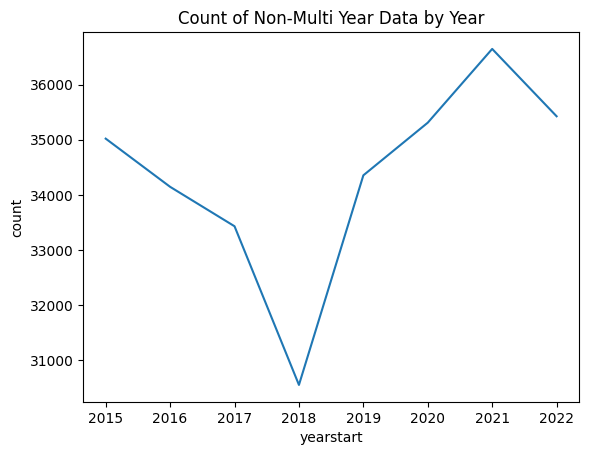

In [388]:
# non multi year data and dist'n
non_multi_year_df = cleaner.drop(multi_year.index)

year_count = (non_multi_year_df.groupby('yearstart')
              .agg(count = ('yearstart', 'count'))
              .reset_index())

sns.lineplot(x = 'yearstart', y = 'count', data = year_count); 
plt.title('Count of Non-Multi Year Data by Year'); 
plt.show(); 


- fewer observations from 2018, why?
    - May come back to this after more pressing things

In [389]:
### Analysis of missing values, taking data_value_footnotes into account

# Are there cases where the above footnote exists WITH missing data?
print('data_value_footnote count on complete data')
complete_data = cleaner[~cleaner['data_value'].isna()]
complete_data['data_value_footnote'].value_counts()

print('data_value_footnote on missing data')
missing_values = cleaner[cleaner['data_value'].isna()]
missing_values['data_value_footnote'].value_counts()


data_value_footnote count on complete data


data_value_footnote
Regional estimates may not represent all states in the region                                                       14224
Fewer than 50 States reporting                                                                                       3361
Estimate is not comparable to those generated using data from years prior to 2019 due to survey question changes     1057
Name: count, dtype: int64

data_value_footnote on missing data


data_value_footnote
Sample size of denominator and/or age group for age-standardization is less than 50 or relative standard error is more than 30%    78875
No Data Available                                                                                                                  12459
Name: count, dtype: int64

In [390]:
# Separate non-multi-year values from data
for_indicators = (cleaner.drop(columns = ['rowid', 'locationdesc', 'topic', 'question',
                                          'data_value_type', 'data_value_footnote', 'classid', 'topicid', 'latitude', 'longitude']))

age_indicators = (pd.get_dummies(for_indicators['stratificationid1'], 
                                dtype=int)
                                .rename(columns = {'5064': 'age: 50-64',
                                                   '65PLUS': 'age: 65+',
                                                   'AGE_OVERALL': 'age: overall'}))

gender_and_race_indicators = (pd.get_dummies(for_indicators['stratificationid2'], 
                                             dtype=int)
                                             .rename(columns = {'ASN': 'race: asian',
                                                                'BLK': 'race: black',
                                                                'FEMALE': 'gender: female',
                                                                'HIS': 'race: hispanic',
                                                                'MALE': 'gender: male',
                                                                'NAA': 'race: native american',
                                                                'OVERALL': 'overall: overall',
                                                                'WHT': 'race: white'}))


In [391]:
# Table for non-multi year strata distribution
table1_df = (cleaner.drop(multi_year.index)
             .merge(age_indicators, left_index = True, right_index = True)
             .merge(gender_and_race_indicators, left_index = True, right_index = True)
             .drop(columns = ['stratificationid1', 'stratificationcategoryid2', 'stratificationid2', 'location_indicator']))

# Table for Missing data strata distribution
table2_df = table1_df[table1_df['data_value'].isnull()]

# Table for Complete data strata distribution
table3_df = table1_df.drop(table2_df.index)

# Table for Multi-year (3 year) data strata distribution
table4_df = (cleaner.iloc[multi_year.index]
          .drop(columns = ['rowid', 'locationdesc', 'topic', 'question', 'data_value_type', 'data_value_footnote', 'classid', 'topicid', 'latitude', 'longitude', 'stratificationid1', 'stratificationcategoryid2', 'stratificationid2', 'location_indicator'])
          .merge(age_indicators, left_index=True, right_index=True, how='left')
          .merge(gender_and_race_indicators, left_index=True, right_index=True, how='left')
          .assign(year_diff = lambda x: (x['yearend'] - x['yearstart']))
)
# Table for multi year = 3 data strata distribution
table4_df = table4_df[table4_df['year_diff'] == 3]

# Possible tables 6, 7, 8, 9 for missing / complete data versions for multi-year data
# Other additions may include dataframes filtered by region (state, territory, region)
    # These could be changed to choropleth maps for clarity
    # or mean and sd across states to infer if a state exists where bias may exist

In [392]:
# Function to get percents of data by year and question

def stratum_perc_distn(dataset):
    """
    Distribtuion of strat for each question over time 
    """
    table = (dataset.groupby(['yearstart', 'questionid'])
          .agg(
              age1_sum = ('age: 50-64', 'sum'),
              age2_sum = ('age: 65+', 'sum'),
              race1_sum = ('race: asian', 'sum'),
              race2_sum = ('race: black', 'sum'),
              race3_sum = ('race: hispanic', 'sum'),
              race4_sum = ('race: native american', 'sum'),
              race5_sum = ('race: white', 'sum'),
              female_sum = ('gender: female', 'sum'),
              male_sum = ('gender: male', 'sum')
              )
          .assign(
              race_tot_sum = lambda x: x['race1_sum'] + x['race2_sum'] + x['race3_sum'] + x['race4_sum'] + x['race5_sum'],
              perc_age_50_64 = lambda x: round(x['age1_sum']/(x['age1_sum'] + x['age2_sum']), 3),
              perc_age_65plus = lambda x: round(x['age2_sum']/(x['age1_sum'] + x['age2_sum']), 3),
              perc_asian = lambda x: round(x['race1_sum']/x['race_tot_sum'],3),
              perc_black = lambda x: round(x['race2_sum']/x['race_tot_sum'],3),
              perc_hispanic = lambda x: round(x['race3_sum']/x['race_tot_sum'],3),
              perc_native_american = lambda x: round(x['race4_sum']/x['race_tot_sum'],3),
              perc_white = lambda x: round(x['race5_sum']/x['race_tot_sum'],3),
              perc_female = lambda x: round(x['female_sum']/(x['female_sum'] + x['male_sum']), 3),
              perc_male = lambda x: round(x['male_sum']/(x['female_sum'] + x['male_sum']), 3)
              )
            .reset_index()
          ) 
    
    table = (table.drop(table.filter(regex='^(?!perc|question|year)').columns, axis = 1)
             .groupby('questionid')
             .agg(
                mean_age_50_64 = ('perc_age_50_64', 'mean'),
                sd_age_50_64 = ('perc_age_50_64', 'std'),
                mean_age_65plus = ('perc_age_65plus', 'mean'),
                sd_age_65plus = ('perc_age_65plus', 'std'),
                mean_female = ('perc_female', 'mean'),
                sd_female =  ('perc_female', 'std'),
                mean_male = ('perc_male', 'mean'),
                sd_male = ('perc_male', 'std'),
                mean_asian = ('perc_asian', 'mean'),
                sd_asian = ('perc_asian', 'std'),
                mean_black = ('perc_black', 'mean'),
                sd_black = ('perc_black', 'std'),
                mean_hispanic = ('perc_hispanic', 'mean'),
                sd_hispanic = ('perc_hispanic', 'std'),
                mean_native_american = ('perc_native_american', 'mean'),
                sd_native_american = ('perc_native_american', 'std'),                 
                mean_white = ('perc_white', 'mean'),
                sd_white = ('perc_white', 'std')
                )
                .reset_index()
                # make distinct by question
             )
    
    return table


In [393]:
# Table for all non-multi year strata distribution
table1 = stratum_perc_distn(table1_df)
# Table for Missing data across non-multi-year strata distribution
table2 = stratum_perc_distn(table2_df)
# Table for Complete data non-multi-year strata distribution
table3 = stratum_perc_distn(table3_df)
# Table for multi year = 3 data strata distribution
table4 = stratum_perc_distn(table4_df)



In [394]:
table1, table2, table3, table4

(   questionid       mean_age_50_64         sd_age_50_64      mean_age_65plus  \
 0         Q01                 0.50                 0.00                 0.50   
 1         Q02                 0.50                 0.00                 0.50   
 2         Q03                 0.50                 0.00                 0.50   
 3         Q04                 0.50                 0.00                 0.50   
 4         Q05                 0.50                 0.00                 0.50   
 5         Q07                 0.50                 0.00                 0.50   
 6         Q08                 0.50                 0.00                 0.50   
 7         Q09                 0.50                 0.00                 0.50   
 8         Q10                 0.50                 0.00                 0.50   
 9         Q11                 0.50                 0.00                 0.50   
 10        Q12                 0.50                 0.00                 0.50   
 11        Q13              

In [395]:
# Mean and for select stratum over all questions
def question_stratum_mean(table):
    means = table[['mean_asian', 'mean_black', 'mean_hispanic', 'mean_native_american', 'mean_white']].mean()
    
    return means

question_stratum_mean(table2)
question_stratum_mean(table3)

mean_asian                             0.31
mean_black                             0.17
mean_hispanic                          0.22
mean_native_american                   0.29
mean_white                             0.01
dtype: float64

mean_asian                             0.08
mean_black                             0.23
mean_hispanic                          0.18
mean_native_american                   0.10
mean_white                             0.41
dtype: float64

### Bias in sampling strategy where there is complete data values and missing data values
Note: For all data sets, single gender questions exist ([10], men only) ([11, 12, 20], women only)   
Note: Missing data value is the value response for a question, not missing data for some stratum
Note: Have not investigated the 'Overall' stratum class as I do not have documentation for it.

- Table1 (Table for all non-multi year strata distribution)
    - sampling strategy stratum representation is extremely consistent year over year for each question
    - nearly identical by question and stratum
        - asian race on 16-17 % of expected 20% for questions 31, 38, 39, 40, 41, and 42
    - not representative of the U.S. population, but represents each stratum almost uniformly
- Table2 (Missing data across non-multi-year strata distribution)
    - Considerable sampling bias OR missing value by gender for question responses with missing data
    - Questions 10, 11, 12, 20 AND 7, 14, 15, 22, 30, 33, 34, 36, 38, 39, 43, 46 do not have gender data
    - Data is less uniformly distributed over the missing data for Race.
        - Asian overrepresented for most questions 
            - mean of 30% across all questions
        - Black underpresented for questions with missing data often 13-17%
            - mean of 17% across all questions
        - Native Americans over represented for questions with missing data
            - mean of 29% across all questions
        - White tend not to be missing data
            - mean of 1% across all questions
    - Age varies less by question per year in the missing data. 
- Table3 (Complete data non-multi-year strata distribution)


- Why is there more missing data for some stratum than others? 
- **These do not take into account state level representation**

In [ ]:
### Template AI Code to refine:
# import seaborn as sns

# def plot_category_trends_seaborn(df, year_col, columns_to_plot): 
#     sns.set(style="whitegrid", palette="muted") # select function other than set
    
#     for col in columns_to_plot:
#         # Group by year and the categorical column, then count occurrences
#         category_counts = df.groupby([year_col, col]).size().reset_index(name='Count')

#         # Plot using seaborn's lineplot
#         plt.figure(figsize=(10, 6))
#         sns.lineplot(data=category_counts, x=year_col, y='Count', hue=col, marker="o")

#         # Set titles and labels
#         plt.title(f'Trend for {col}', fontsize=16)
#         plt.xlabel('Year', fontsize=12)
#         plt.ylabel('Count', fontsize=12)
#         plt.legend(title=col, bbox_to_anchor=(1.05, 1), loc='upper left')
#         plt.tight_layout()
#         plt.show()